In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import thisrepo
from actual.scm import read_system

# Suzy/Billy's example

In [2]:
%%writefile suzy_billy.conf
[equations]
ST = STu
BT = BTu

# Suzy's rock hits if she throws.
SH = ST

# Billy's rock hits only if he throws and Suzy doesn't throw.
BH = BT * (1 - ST)

# The bottle is shattered if either rock hits.
BS = min(1, SH + BH)

[domains]
ST,BT,SH,BH,BS: Int(0,1)

Overwriting suzy_billy.conf


/home/me/phd/liab/examples/../src/actual/scm.py:232: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


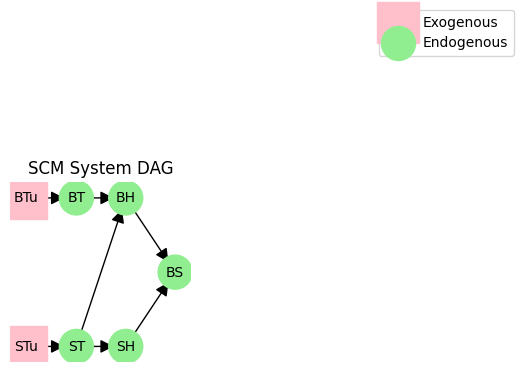

In [3]:
system = read_system('suzy_billy.conf')
system.display_dag()

In [4]:
# testing the system
for STu, BTu in [[0,0],[0,1],[1,0],[1,1]]:
    print(STu, BTu)
    state = system.get_state({'STu': STu, 'BTu': BTu})
    assert state['BS'] == min(1,STu + BTu)

0 0
0 1
1 0
1 1


In [5]:
a = system.get_state({'STu': 0, 'BTu': 1}, interventions={'SH': 1})['BS']
assert a == 1, a

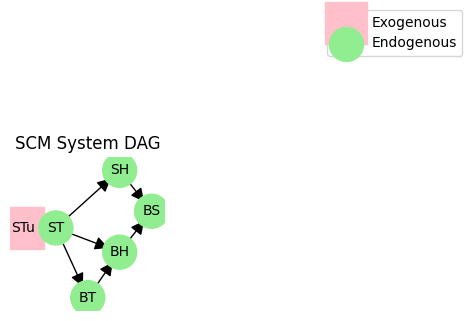

{'ST': 1, 'BT': 0, 'SH': 1, 'BH': 0, 'BS': 1}


In [6]:
system2 = system.replace('BT=1-ST')
system2.display_dag()
state2 = system2.get_state({'ST': 1})
print(state2)

In [29]:
from actual.hp_modified import find_all_causes, pretty_print_causes


causes = find_all_causes(system, {'STu': 0, 'BTu': 1}, 'BS', '==', 1)
pretty_print_causes(system, {'STu': 0, 'BTu': 1}, causes)

100%|██████████| 16/16 [00:00<00:00, 2713.33it/s]

The fact that ST=0 (ST'=1) under the contingency SH=0
The fact that ST=0 (ST'=1) under the contingency BT=1,SH=0
The fact that BH=1 (BH'=0)
The fact that BH=1 (BH'=0) under the contingency ST=0
The fact that BH=1 (BH'=0) under the contingency SH=0
The fact that BH=1 (BH'=0) under the contingency BT=1
The fact that BH=1 (BH'=0) under the contingency ST=0,SH=0
The fact that BH=1 (BH'=0) under the contingency ST=0,BT=1
The fact that BH=1 (BH'=0) under the contingency SH=0,BT=1
The fact that BH=1 (BH'=0) under the contingency ST=0,SH=0,BT=1
The fact that BT=1 (BT'=0)
The fact that BT=1 (BT'=0) under the contingency ST=0
The fact that BT=1 (BT'=0) under the contingency SH=0
The fact that BT=1 (BT'=0) under the contingency ST=0,SH=0
